<h2>1. Метод k-средних</h2>
В вашем распоряжении имеются данные о различных продуктах в интернет-магазине. Задача — сгруппировать их на три кластера с помощью алгоритма k-means. Осуществите алгоритм кластеризации и выведите центроиды кластеров.

[[0.1728477  0.59187921]
 [0.59386696 0.19927681]
 [0.76854955 0.71225015]]


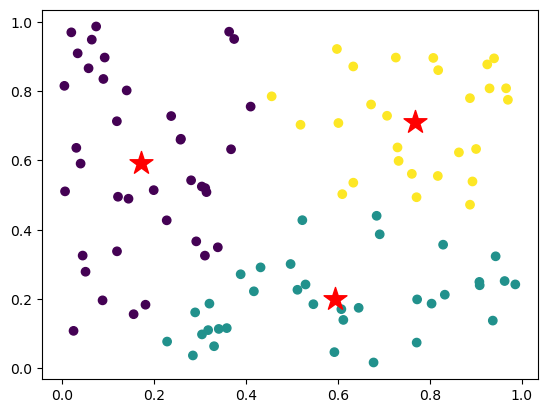

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


np.random.seed(42)
X = np.random.rand(100, 2)

k_means = KMeans(n_clusters=3)
k_means.fit(X)

labels = k_means.labels_
center_coords = k_means.cluster_centers_


print(center_coords)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(center_coords[:, 0], center_coords[:, 1], marker='*', s=300, c='r')
plt.show()


<h2> 2. Иерархическая кластеризация </h2>
В этом задании вы выполните иерархическую кластеризацию на примере случайного набора данных и вычислите силуэтный коэффициент кластеризации — метрику, показывающую качество кластеризации.

Для вас сгенерирован искусственный набор данных с помощью функции make_blobs из библиотеки sklearn.datasets. 

Что нужно сделать:

1. Используйте функцию linkage из библиотеки scipy.cluster.hierarchy для проведения иерархической кластеризации над созданным набором данных. В качестве параметра method можно использовать ward.

2. Используйте функцию silhouette_score из библиотеки sklearn.metrics для вычисления силуэтного коэффициента кластеризации. Силуэтный коэффициент может принимать значения от -1 до 1, где ближе к 1 — лучше.

3. Сохраните полученное значение силуэтного коэффициента и выведите его на экран.

4. Повторите шаги 1–3 не менее чем для 10 случайных наборов данных и усредните полученные значения силуэтных коэффициентов.

5. В качестве результата задания выведите на экран средний силуэтный коэффициент.

0.7342129315790209


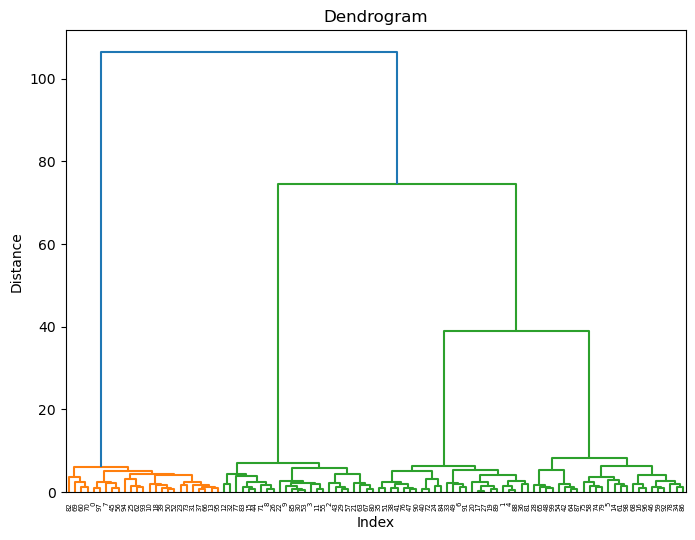

0.7588498590551314


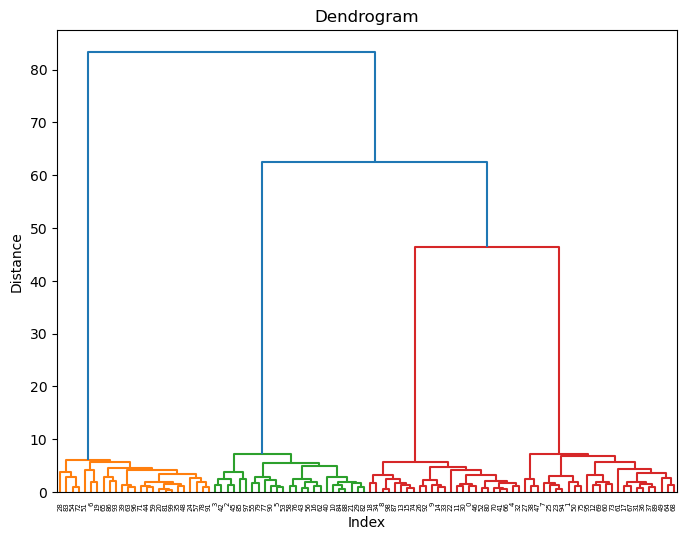

0.5981066468725698


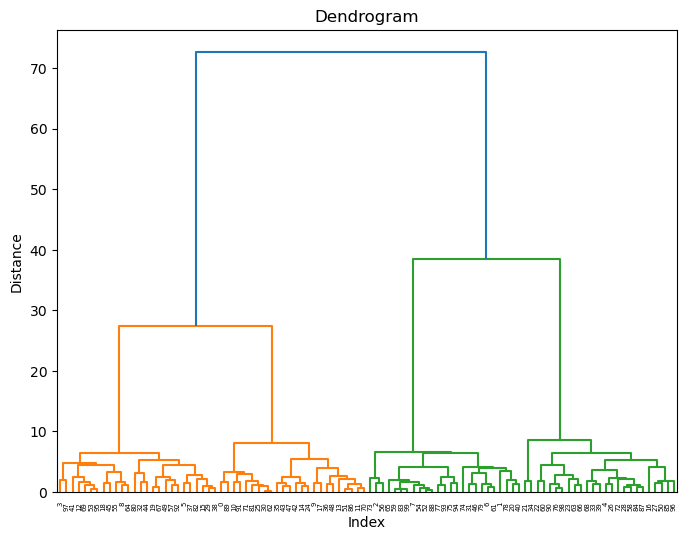

0.7529063638339899


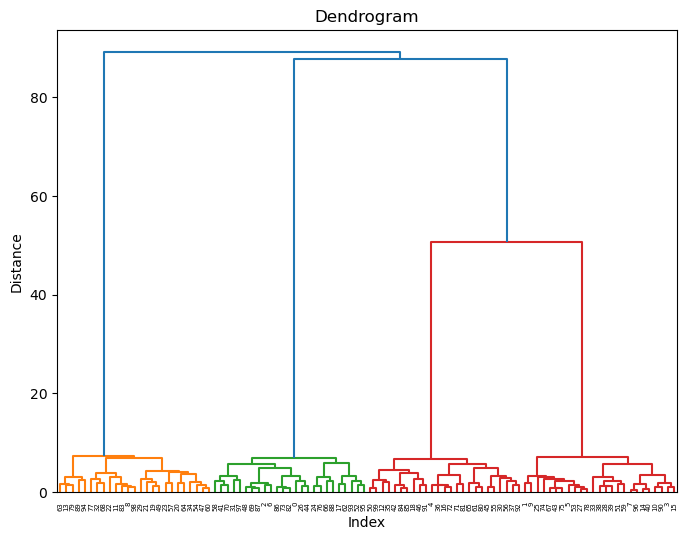

0.8118811138698677


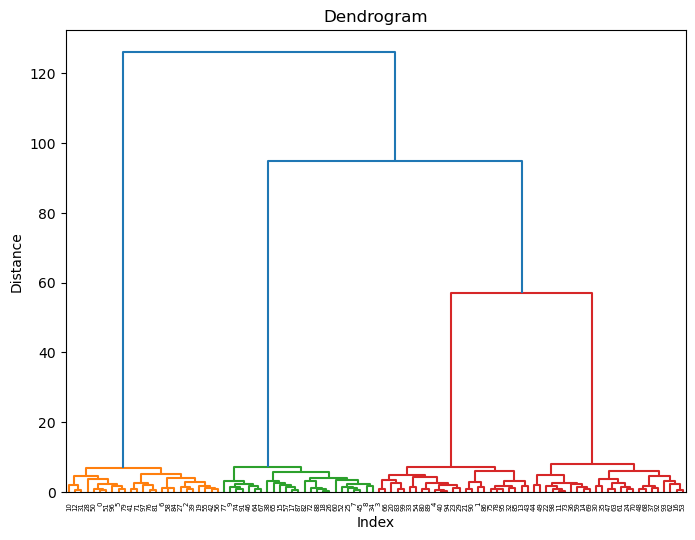

0.7908766199383688


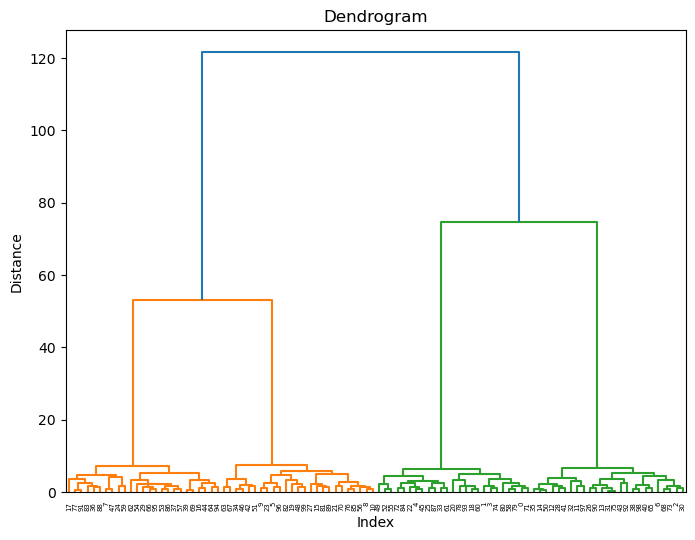

0.7186103227487628


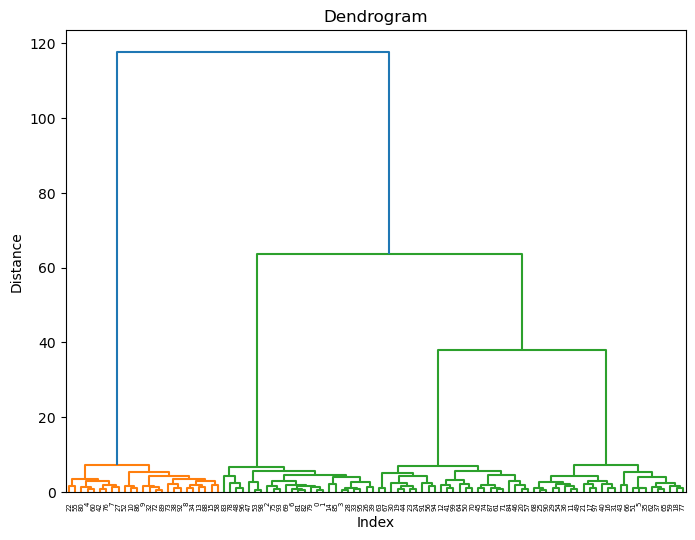

0.7561768145562359


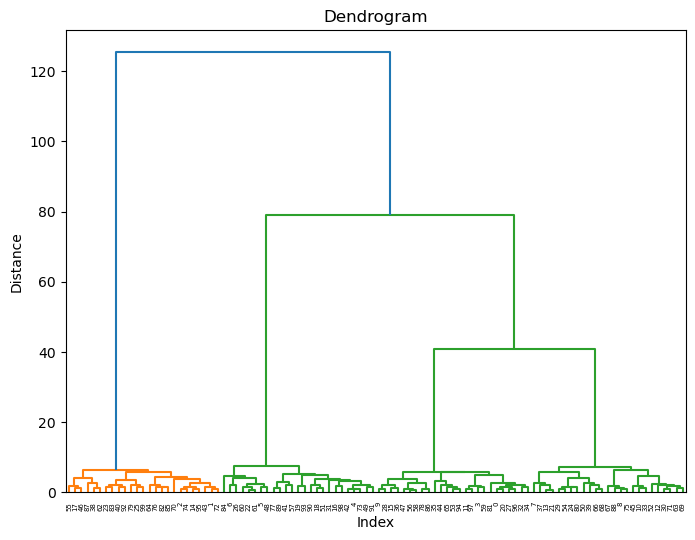

0.6812742746955424


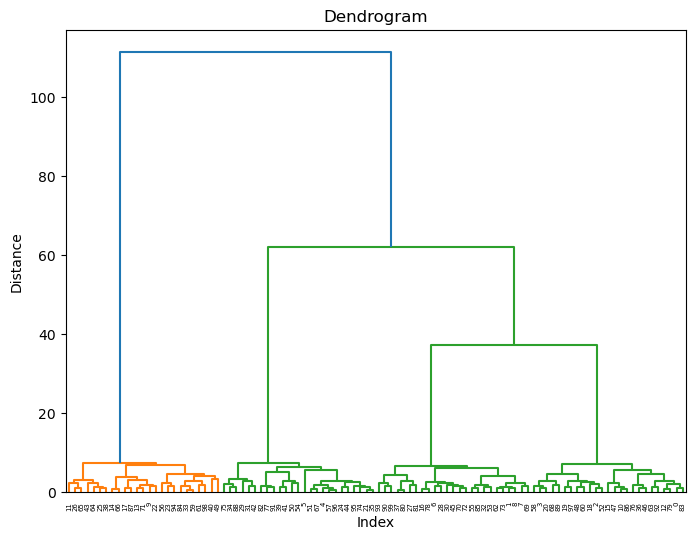

0.718017227342148


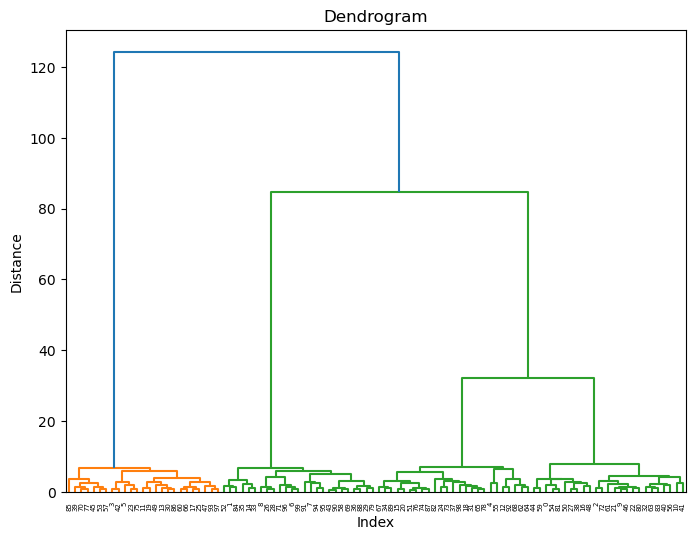

avg = 0.7320912174491638


In [33]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=100, n_features=4, centers=4, random_state=42)

res = []

for i in range(10):
    X, y = make_blobs(n_samples=100, n_features=4, centers=4, random_state=i)

    Z = linkage(X, 'ward')
    labels = fcluster(Z, t=4, criterion='maxclust')
    silhouette = silhouette_score(X, labels)
    print(silhouette)
    res.append(silhouette)
    fig, ax = plt.subplots(figsize=(8, 6))
    dendrogram(Z)
    plt.title("Dendrogram")
    plt.xlabel("Index")
    plt.ylabel("Distance")
    plt.show()
silhouette_avg = sum(res) / len(res)
print("avg =", silhouette_avg)



<h2> 3. Алгоритм DBSCAN </h2>
В этом задании вы выполните кластеризацию на примере случайного набора данных, применив алгоритм DBSCAN, и вычислите силуэтный коэффициент кластеризации.

Для вас созданы искусственные данные с помощью модуля sklearn.datasets.make_blobs() с количеством кластеров, достаточным для проведения кластеризации. 

Что нужно сделать:

1.	Импортируйте модуль sklearn.cluster.DBSCAN для реализации алгоритма DBSCAN.

2.	Реализуйте функцию, которая на вход принимает значения eps и min_samples, использует алгоритм DBSCAN для кластеризации данных и вычисляет силуэтный коэффициент для каждой точки. Функция должна возвращать средний силуэтный коэффициент для всех точек.

3.	Напишите цикл, который перебирает различные значения eps и min_samples, и для каждой комбинации вызывает функцию из пункта 1, сохраняя оптимальные значения eps и min_samples с наибольшим средним силуэтным коэффициентом.

4.	Выведите найденные оптимальные значения eps и min_samples, а также средний силуэтный коэффициент для них.

In [58]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    # labels = dbscan.fit_predict(X)
    # silhouette = silhouette_score(X, labels)
    # print(silhouette)
    if len(set(labels)) > 1:
        # Расчет силуэтных коэффициентов для каждой точки
        silhouette_values = silhouette_samples(X, labels)
        # print(silhouette_values)
        # Возврат среднего силуэтного коэффициента
        return np.mean(silhouette_values)
    else:
        # Если кластеров меньше 2 (например, все точки в одном кластере или выбросы), вернуть -1 или другое значение
        return -1


best_eps, best_min_samples, best_silhouette = None, None, -1
for eps in [0.1, 0.5, 1]:
    for min_samples in [5, 10, 20]:
        silhouette = dbscan_silhouette(eps, min_samples)
        if silhouette > best_silhouette:
            best_eps, best_min_samples, best_silhouette = eps, min_samples, silhouette
        
print([best_eps, best_min_samples, best_silhouette])


[1, 10, 0.8229345005215012]


In [60]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    if len(set(labels)) > 1:
        silhouette_values = silhouette_samples(X, labels)
        return np.mean(silhouette_values)
    else:
        return -1
    
    
best_eps, best_min_samples, best_silhouette = None, None, -1
for eps in [0.1, 0.5, 1]:
    for min_samples in [5, 10, 20]:
        silhouette = dbscan_silhouette(eps, min_samples)
        if silhouette > best_silhouette:
            best_eps, best_min_samples, best_silhouette = eps, min_samples, silhouette
            
print([best_eps, best_min_samples, best_silhouette])


[1, 10, 0.8229345005215012]


<h2> 4. Метод главных компонент </h2>
Используя библиотеку sklearn.decomposition.PCA, найдите 3 главных компоненты для заданных данных. Рассчитайте долю объясненной дисперсии каждой главной компоненты. Для этого можно воспользоваться атрибутом explained_variance_ratio_ объекта PCA и вывести получившийся вектор.

In [64]:
import numpy as np
from sklearn.decomposition import PCA
np.random.seed(42)
X = np.random.rand(100, 5)

# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# explained_variance_ratio = pca.explained_variance_ratio_
# print(explained_variance_ratio)
# loadings = pca.components_
loadings = pca.explained_variance_ratio_
print(loadings)

[0.28857914 0.23635118 0.18619353]


<h2> 5. Составление рекомендаций по матрице рейтингов </h2>
В этом задании вы будете использовать матрицу рейтингов для составления предсказания пользовательских предпочтений.

Что нужно сделать:

Используя библиотеку Scikit-learn, разложите матрицу рейтингов на сингулярные значения с помощью метода SVD.
Для выбранного пользователя user_id = 2 из матрицы рейтингов предскажите рейтинг для товара item_id = 4 с точностью до десятых на основе полученных после разложения матрицы сингулярных значений.


In [66]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import svds

np.random.seed(42)
X = np.random.rand(100, 5)

U, S, Vt = svds(X, k=2)
S_diag = np.diag(S)
predicted_ratings = np.dot(np.dot(U, S_diag), Vt)

user_id = 2
item_id = 4
# print(predicted_ratings)
result = predicted_ratings[2, 4]
result = round(result, 1)

print(result)

0.133070675408524


[[-0.38432524  2.3922832 ]
 [-3.221395   -4.037162  ]
 [-0.78720963  3.5755112 ]
 [ 5.5518208  -0.41545588]
 [ 5.1143923   2.599904  ]
 [ 3.306312    0.13602638]
 [ 1.3310801  -4.5369725 ]
 [ 2.4204535  -2.3922153 ]
 [-3.2256777   3.8893027 ]
 [ 3.2894573   0.6057335 ]
 [-0.33559945  0.09863705]
 [ 5.7879167   3.5954084 ]
 [ 5.0874424   0.13882962]
 [-4.777667   -3.3114712 ]
 [ 1.8074565  -3.86429   ]
 [ 2.4603763   4.715354  ]
 [ 3.4836023   3.426231  ]
 [-2.8364265   1.4255128 ]
 [-3.7848225  -0.34444323]
 [ 3.9230053   2.8995779 ]
 [-4.9591136  -0.3889047 ]
 [ 5.7180967   0.4386996 ]
 [-2.8053882  -4.1913867 ]
 [ 0.60454756 -1.4991838 ]
 [ 2.6184924   3.6830475 ]
 [-2.1631033  -1.8661227 ]
 [ 0.25566122 -5.159264  ]
 [-3.976982   -2.0786157 ]
 [ 4.0603356   1.9089788 ]
 [ 6.970201    1.0623521 ]
 [ 1.7495226  -5.2962446 ]
 [-3.8148715  -1.642212  ]
 [ 0.48701555  1.9352493 ]
 [ 5.329012    3.9423409 ]
 [ 5.684419    2.7600632 ]
 [-2.804742    3.21157   ]
 [-2.1018062  -4.640722  ]
 

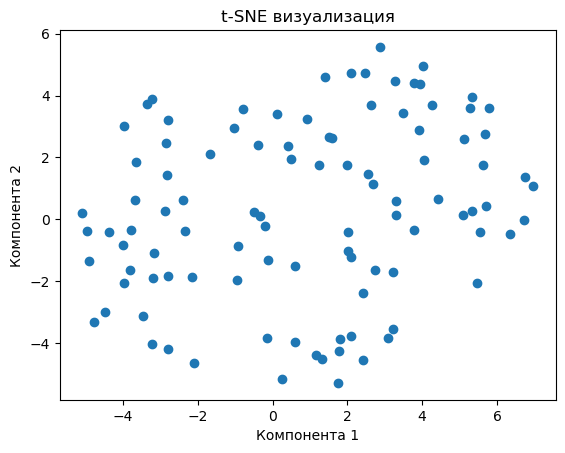

In [68]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Устанавливаем сид для воспроизводимости
np.random.seed(42)

# Генерируем случайные данные размерностью (100, 5)
X = np.random.rand(100, 5)

# Применяем t-SNE для понижения размерности до 2
tsne = TSNE(n_components=2, random_state=42)
result = tsne.fit_transform(X)

# Выводим результат (результат после понижения размерности)
print(result)

# Визуализируем результат
plt.scatter(result[:, 0], result[:, 1])
plt.title("t-SNE визуализация")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()


In [70]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Пример матрицы рейтингов (пользователи - строки, товары - столбцы)
ratings_matrix = np.array([
    [5, 3, 0, 1, 4],  # Рейтинги пользователя 1
    [4, 0, 0, 2, 3],  # Рейтинги пользователя 2
    [3, 4, 5, 0, 2],  # Рейтинги пользователя 3
    [2, 3, 0, 3, 4],  # Рейтинги пользователя 4
    [1, 2, 3, 4, 0]   # Рейтинги пользователя 5
])

# Используем SVD для разложения матрицы рейтингов на сингулярные компоненты
svd = TruncatedSVD(n_components=2)  # Разбиение на 2 компоненты (для упрощения)
svd_matrix = svd.fit_transform(ratings_matrix)

# Получаем сингулярные значения
sigma = np.diag(svd.singular_values_)

# Восстановление матрицы с пониженной размерностью
svd_approximation = np.dot(np.dot(svd_matrix, sigma), svd.components_)

# Предсказание рейтинга для пользователя user_id=2 и товара item_id=4
user_id = 1  # Индекс пользователя (включая 0)
item_id = 3  # Индекс товара (включая 0)

# Предсказанный рейтинг
predicted_rating = svd_approximation[user_id, item_id]

# Округление до десятых
predicted_rating_rounded = round(predicted_rating, 1)

print(f"Предсказанный рейтинг для пользователя {user_id + 1} и товара {item_id + 1}: {predicted_rating_rounded}")


Предсказанный рейтинг для пользователя 2 и товара 4: 17.2


In [80]:
import numpy as np
from scipy.linalg import svd

# Задание: Создание матрицы рейтингов
np.random.seed(42)
ratings = np.random.randint(1, 6, size=(5, 5)).astype(float)  # Матрица рейтингов 5x5

# Разложение матрицы с помощью SVD
U, S, Vt = svd(ratings, full_matrices=False)

# Сечение сингулярных значений и матриц для 2 компонент
S = np.diag(S[:2])  # Матрица S для первых 2 сингулярных значений
U = U[:, :2]  # Оставляем первые 2 столбца
Vt = Vt[:2, :]  # Оставляем первые 2 строки

# Получение приближенной матрицы рейтингов
predicted_ratings = np.dot(np.dot(U, S), Vt)

# Для предсказания рейтинга для пользователя user_id = 2 и товара item_id = 4
user_id = 2
item_id = 4

# Индексация в Python начинается с 0, поэтому user_id=2 и item_id=4 - это индексы 1 и 3 соответственно
result = predicted_ratings[user_id, item_id]

# Вывод результата с точностью до десятых
print(round(result, 1))


3.9


<h2> 6. Исследование факторов успеха продаж </h2>
В этом задании вы выполните анализ данных о продажах и выявите основные факторы, влияющие на успешность продаж.

Вам дан набор данных, содержащий информацию о продажах различных видов одежды в различных регионах за последний год. Набор данных представлен в виде матрицы размером 1000x10, где каждая строка соответствует отдельной продаже, а каждый столбец — определенному атрибуту продажи.

Ваша задача:

1.	При помощи библиотеки Scikit-learn выполнить алгоритм PCA для сокращения размерности данных до 3-х компонент.

2.	Определить путем анализа факторной нагрузки, какие три фактора первой главной компоненты являются наиболее важными факторами, влияющими на успешность продаж.

3.	Округлить сумму весов этих наиболее важных факторов до двух знаков после запятой и предоставить ее в качестве ответа.

In [73]:
import numpy as np
from sklearn.decomposition import PCA
np.random.seed(42)
# Создание искусственных данных
data = np.random.rand(1000, 10)
# Выполнение алгоритма PCA для сокращения размерности до 3-х компонент
pca = PCA(n_components=3)
pca.fit(data)
# Анализ факторной нагрузки
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# Выбор наиболее важных факторов
most_important_factors = np.argsort(np.abs(loadings), axis=0)[::-1][:3]
# Вычисление суммы весов наиболее важных факторов
sum_weights = np.sum(np.abs(loadings[most_important_factors[:, 0], 0]))
# Округление ответа до двух знаков после запятой
sum_weights_rounded = round(sum_weights, 2)
# Вывод результата
print(sum_weights_rounded)

0.47


<h2> 7. Матричное разложение </h2>
В этом задании вы будете работать с матрицей рейтингов. 

Что нужно сделать:

1.	Создайте матрицу рейтингов размером 5x5 и заполните ее случайными значениями от 1 до 5. 

2.	Используя библиотеку Scipy, разложите матрицу с помощью метода SVD с числом компонент равным 2. 

3.	Найдите произведение двух полученных матриц, чтобы получить приближенную матрицу рейтингов. 

4.	Вычислите RMSE (корень из среднеквадратической ошибки) между исходной матрицей рейтингов и приближенной матрицей рейтингов. Округлите ответ до двух знаков после запятой.

In [77]:
import numpy as np
from scipy.linalg import svd
from sklearn.metrics import mean_squared_error
np.random.seed(42)

# Создание матрицы рейтингов
ratings = np.random.randint(1, 6, size=(5, 5)).astype(float)

# Разложение матрицы с помощью SVD
U, S, Vt = svds(ratings, k=2)

S_diag = np.diag(S)

# Получение приближенной матрицы рейтингов
ratings_approx = np.dot(np.dot(U, S_diag), Vt)

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(ratings, ratings_approx))

print(round(rmse, 2))

0.66


In [79]:
import numpy as np
from scipy.linalg import svd
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# Создание матрицы рейтингов с плавающей точкой
ratings = np.random.randint(1, 6, size=(5, 5)).astype(float)

# Разложение матрицы с помощью SVD (с числом компонент равным 2)
U, S, Vt = svd(ratings, full_matrices=False)

S = np.diag(S[:2])  
U = U[:, :2]  
Vt = Vt[:2, :]  

# Получение приближенной матрицы рейтингов
ratings_approx = np.dot(np.dot(U, S), Vt)

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(ratings, ratings_approx))

# Округление и вывод результата
print(round(rmse, 2))


0.66


<h2> 8. Матричное разложение № 2 </h2>
Продолжаем работать с матрицей рейтингов. 

Что нужно сделать:

1.	Создайте матрицу рейтингов размером 4x4 и заполните ее случайными значениями от 1 до 5.

2.	Используя библиотеку Numpy, разложите матрицу с помощью метода SVD с числом компонент равным 3. Найдите сингулярные числа (s) и матрицу, состоящую из левых сингулярных векторов (U). 

3.	Вычислите долю общей дисперсии, которую объясняют первые две компоненты. Округлите ответ до двух знаков после запятой.

In [82]:
import numpy as np
from numpy.linalg import svd
np.random.seed(42)
# Создание матрицы рейтингов
ratings = np.random.randint(1, 6, size=(4, 4))
# Разложение матрицы с помощью SVD
U, s, Vt = svd(ratings, full_matrices=False)

S = np.diag(s[:2])  
U = U[:, :2]  
Vt = Vt[:2, 2]  

# Вычисление доли общей дисперсии
variance_explained = np.sum(S**2) / np.sum(s**2)
print(round(variance_explained, 2))


0.99


<h2> 9. Составление рекомендаций по матрице рейтингов </h2>
В этом задании вы будете использовать матрицу рейтингов для составления предсказания пользовательских предпочтений. 

Что нужно сделать:

1.	Используя библиотеку Scikit-learn, разложите матрицу рейтингов на сингулярные значения с помощью метода SVD.

2.	Для выбранного пользователя user_id = 2 из матрицы рейтингов предскажите рейтинг для товара item_id = 4 с точностью до десятых на основе полученных после разложения матрицы сингулярных значений.

In [87]:
import numpy as np
from sklearn.decomposition import TruncatedSVD


# Создаем матрицу рейтингов пользователей и товаров
R = np.array([[3, 1, 2, 3],
[4, 3, 4, 3],
[2, 2, 1, 5],
[1, 5, 5, 2]])
# Для примера будем считать, что нам нужно предсказать рейтинг для пользователя 2 и товара 4
user_id = 2
item_id = 4
n_components = 2 # количество главных компонент, которые мы оставляем
# Ищем среднее значение рейтингов для каждого товара и вычитаем его из матрицы рейтингов
item_means = np.mean(R, axis=0)
R_norm = R - item_means
# Вычисляем сингулярное разложение матрицы рейтингов
svd = TruncatedSVD(n_components=n_components)
U, s, Vt = svd.fit_transform(R_norm), np.diag(svd.singular_values_), svd.components_
# Определяем размерность матрицы рейтингов и уменьшаем размерность сингулярным разложением
n_users, n_items = R_norm.shape

S = s
U_red = U
Vt_red = Vt
R_pred = np.dot(np.dot(U_red, S), Vt_red) + item_means
# Округляем предсказание до одной десятой
rating_pred = round(R_pred[user_id - 1, item_id - 1] , 1)
print(f"Предсказанный рейтинг для пользователя {user_id} и товара {item_id}: {rating_pred}")

Предсказанный рейтинг для пользователя 2 и товара 4: 0.9
